In [1]:
import pandas as pd
import os
import numpy as np
#Matplotlib forms basis for visalization in Python
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

#Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 8
plt.rcParams['image.cmap'] = 'viridis'


In [2]:
##To know path where we are
print(os.getcwd())

/home/ruralkan/code/jupyter/GabCeva/InfoGanadero


In [3]:
%%time
#Import Excel files
stats = pd.read_csv('2019_ene_junio.txt',  sep='\t+', engine='python') 

CPU times: user 1.68 s, sys: 58.4 ms, total: 1.74 s
Wall time: 1.79 s


In [5]:
from pandas import ExcelWriter
from pandas import ExcelFile
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('VentasGanado.xlsx', engine='xlsxwriter')

# Analisis del mercado de los laboratorios

In [6]:
ventas = stats.groupby('LABORATORIO')['VENTAS'].sum()
ventas.sort_values(ascending=False).to_excel(writer, sheet_name='Generales')

In [32]:
percent = ventas/ ventas.sum()
percent.sort_values(ascending=False)


LABORATORIO
ZOETIS        0.204909
MSD           0.181397
BIAH          0.175312
BAYER         0.136960
ELANCO        0.094322
VIRBAC        0.075876
CEVA          0.038146
BIOZOO        0.025187
CHINOIN       0.017283
SANFER        0.010840
OURO FINO     0.010055
VETOQUINOL    0.008650
SYVA          0.005875
PANAVET       0.005833
SENOSIAIN     0.005130
BIMEDA        0.004225
Name: VENTAS, dtype: float64

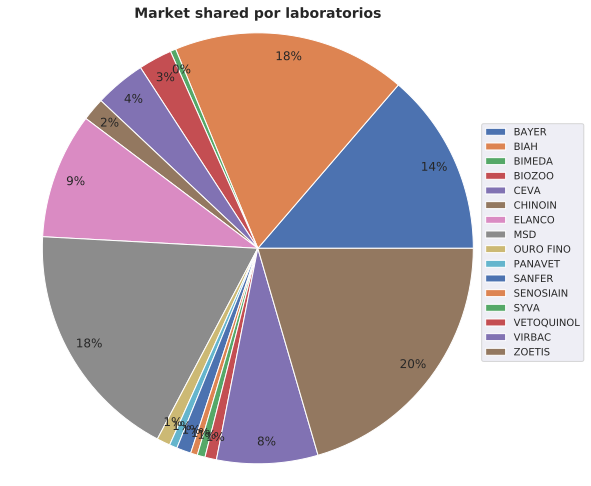

In [135]:
from matplotlib import rc
percent = ventas/ ventas.sum()
plt.gca().axis("equal")
pie = plt.pie(percent, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
labels=percent.index.unique()
plt.title('Market shared por laboratorios', weight='bold', size=14)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

plt.show()
plt.clf()
plt.close()

# Ventas por laboratorio (Ganadero)

In [7]:
df = stats[stats.MAIN_SPECIE == "Ganadero"].groupby('LABORATORIO')['VENTAS'].sum()
df.sort_values(ascending=False).to_excel(writer, sheet_name='Ganadero')

In [30]:
percent = df/ df.sum()
percent.sort_values(ascending=False)

LABORATORIO
ZOETIS       0.429674
MSD          0.118202
BIAH         0.103342
BIOZOO       0.099235
CHINOIN      0.067993
SANFER       0.049087
ELANCO       0.043940
SENOSIAIN    0.041898
BAYER        0.027880
VIRBAC       0.018193
CEVA         0.000295
SYVA         0.000262
Name: VENTAS, dtype: float64

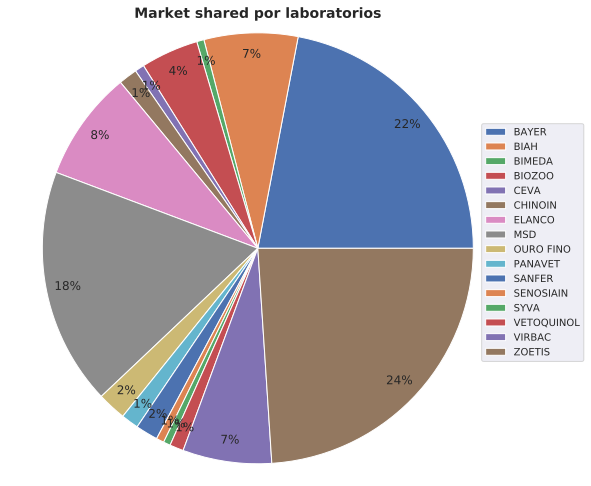

In [138]:
from matplotlib import rc
percent = df/ df.sum()
plt.gca().axis("equal")
pie = plt.pie(df, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
labels=percent.index.unique()
plt.title('Market shared por laboratorios', weight='bold', size=14)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

plt.show()
plt.clf()
plt.close()

## Ventas por laboratorio (Ganadero, Biologicos)

In [8]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "BIOLOGICOS") ].groupby('LABORATORIO')['VENTAS'].sum()
df.sort_values(ascending=False).to_excel(writer, sheet_name='Biologicos')

## Ventas por laboratorio (Ganadero, capitulo: Farmaceuticos)

In [9]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") ].groupby('LABORATORIO')['VENTAS'].sum()
df.sort_values(ascending=False).to_excel(writer, sheet_name='Farmaceuticos')

## Ventas por laboratorio (Ganadero, capitulo: Farmaceuticos, subgrupo: Intramamarios y Topicos)

In [10]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.SUBGRUPO.isin(["INTRAMAMARIOS","TOPICOS"])) ].groupby('LABORATORIO')['VENTAS'].sum()
df.sort_values(ascending=False).to_excel(writer, sheet_name='Intramamarios y topicos')

## Ventas por producto (Ganadero, capitulo: Farmaceuticos, subgrupo: Intramamarios y Topicos)

In [12]:
# df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.SUBGRUPO.isin(["INTRAMAMARIOS","TOPICOS"])) ].pivot_table(columns="LABORATORIO",index= "PRODUCTO",values="VENTAS", margins = True, margins_name="Total", aggfunc=np.sum, fill_value=0)
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.SUBGRUPO.isin(["INTRAMAMARIOS","TOPICOS"])) ].pivot_table(index=["LABORATORIO","PRODUCTO"],values=["VENTAS"], margins = True, margins_name="Total", aggfunc=np.sum, fill_value=0)
df.sort_values(by=["VENTAS"], ascending=False).to_excel(writer, sheet_name='producto intramamarios')

## Ventas por laboratorio (Ganadero, capitulo: Farmaceuticos, grupo: Hormonal)

In [13]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "HORMONALES") ].groupby('LABORATORIO')['VENTAS'].sum()
df.sort_values(ascending=False).to_excel(writer, sheet_name='hormonal')

## Ventas por Producto (Ganadero, capitulo: Farmaceuticos, grupo: Hormonal)

In [14]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "HORMONALES") ].pivot_table(index=["LABORATORIO","PRODUCTO"],values=["VENTAS"], margins = True, margins_name="Total", aggfunc=np.sum, fill_value=0)
df.sort_values(by=["VENTAS"],ascending=False).to_excel(writer, sheet_name='producto hormonal')

## Ventas por laboratorio (Ganadero, capitulo: Farmaceuticos, grupo: Antimicrobianos, subgrupo: Inyectables)

In [15]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIMICROBIANOS") & (stats.SUBGRUPO == "INYECTABLES") ].groupby('LABORATORIO')['VENTAS'].sum()
df.sort_values(ascending=False).to_excel(writer, sheet_name='antimicro inyectables')

## Ventas por producto (Ganadero, capitulo: Farmaceuticos, grupo: Antimicrobianos, subgrupo: Inyectables)

In [16]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIMICROBIANOS") & (stats.SUBGRUPO == "INYECTABLES") ].pivot_table(index=["LABORATORIO","PRODUCTO"],values=["VENTAS"], margins = True, margins_name="Total", aggfunc=np.sum, fill_value=0)
df.sort_values(by=["VENTAS"], ascending=False).to_excel(writer, sheet_name='prod antimicro inyec')

## Ventas por laboratorio (Ganadero, capitulo: Farmaceuticos, grupo: Antiparasitario)

In [17]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIPARASITARIOS")].groupby('LABORATORIO')['VENTAS'].sum()
df.sort_values(ascending=False).to_excel(writer, sheet_name='antiparasitario')

## Ventas por producto (Ganadero, capitulo: Farmaceuticos, grupo: Antiparasitario)

In [18]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIPARASITARIOS")].pivot_table(index=["LABORATORIO","PRODUCTO"],values=["VENTAS"], margins = True, margins_name="Total", aggfunc=np.sum, fill_value=0)
df.sort_values(by=["VENTAS"], ascending=False).to_excel(writer, sheet_name='prod antiparasitario')

## Ventas por laboratorio (Ganadero, capitulo: Farmaceuticos, grupo: Antiparasitario, subgrupo: Ectoparasiticida)

In [19]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIPARASITARIOS") & (stats.SUBGRUPO == "ECTOPARASITICIDA") ].groupby('LABORATORIO')['VENTAS'].sum()
df.sort_values(ascending=False).to_excel(writer, sheet_name='ecto')

## Ventas por producto (Ganadero, capitulo: Farmaceuticos, grupo: Antiparasitario, subgrupo: Ectoparasiticida)

In [20]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIPARASITARIOS") & (stats.SUBGRUPO == "ECTOPARASITICIDA") ].pivot_table(index=["LABORATORIO","PRODUCTO"],values=["VENTAS"], margins = True, margins_name="Total", aggfunc=np.sum, fill_value=0)
df.sort_values(by=["VENTAS"], ascending=False).to_excel(writer, sheet_name='prod ecto')

## Ventas por laboratorio (Ganadero, capitulo: Farmaceuticos, grupo: Antiparasitario, subgrupo: Endectocida)

In [21]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIPARASITARIOS") & (stats.SUBGRUPO == "ENDECTOCIDA") ].groupby('LABORATORIO')['VENTAS'].sum()
df.sort_values(ascending=False).to_excel(writer, sheet_name='ende')

## Ventas por producto (Ganadero, capitulo: Farmaceuticos, grupo: Antiparasitario, subgrupo: Endectocida)

In [22]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIPARASITARIOS") & (stats.SUBGRUPO == "ENDECTOCIDA") ].pivot_table(index=["LABORATORIO","PRODUCTO"],values=["VENTAS"], margins = True, margins_name="Total", aggfunc=np.sum, fill_value=0)
df.sort_values(by=["VENTAS"], ascending=False).to_excel(writer, sheet_name='prod ende')

## Ventas por laboratorio (Ganadero, capitulo: Farmaceuticos, grupo: Antiparasitario, subgrupo: Endectocida, clase: Larga duracion)

In [23]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIPARASITARIOS") & (stats.SUBGRUPO == "ENDECTOCIDA") & (stats.CLASE == "Larga acción")].groupby('LABORATORIO')['VENTAS'].sum()
df.sort_values(ascending=False).to_excel(writer, sheet_name='ende larga accion')

## Ventas por producto (Ganadero, capitulo: Farmaceuticos, grupo: Antiparasitario, subgrupo: Endectocida, clase: Larga duracion)

In [24]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIPARASITARIOS") & (stats.SUBGRUPO == "ENDECTOCIDA")  & (stats.CLASE == "Larga acción") ].pivot_table(index=["LABORATORIO","PRODUCTO"],values=["VENTAS"], margins = True, margins_name="Total", aggfunc=np.sum, fill_value=0)
df.sort_values(by=["VENTAS"], ascending=False).to_excel(writer, sheet_name='prod ende larga duracion')

## Ventas por laboratorio (Ganadero, capitulo: Farmaceuticos, grupo: Antiparasitario, subgrupo: Endoparasiticida)

In [25]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIPARASITARIOS") & (stats.SUBGRUPO == "ENDOPARASITICIDA") ].groupby('LABORATORIO')['VENTAS'].sum()
df.sort_values(ascending=False).to_excel(writer, sheet_name='endo')

## Ventas por producto (Ganadero, capitulo: Farmaceuticos, grupo: Antiparasitario, subgrupo: Endoparasiticida)

In [26]:
df = stats[(stats.MAIN_SPECIE == "Ganadero") & (stats.CAPITULO == "FARMACEUTICOS") & (stats.GRUPO == "ANTIPARASITARIOS") & (stats.SUBGRUPO == "ENDOPARASITICIDA") ].pivot_table(index=["LABORATORIO","PRODUCTO"],values=["VENTAS"], margins = True, margins_name="Total", aggfunc=np.sum, fill_value=0)
df.sort_values(by=["VENTAS"], ascending=False).to_excel(writer, sheet_name='prod endo')

In [27]:
# Close the Pandas Excel writer and output the Excel file.
writer.save()